In [ ]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout
from tensorflow.keras.utils import plot_model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from keras.preprocessing.image import ImageDataGenerator
# from skimage import io
# datagen = ImageDataGenerator(
#         rotation_range = 40,
#         shear_range = 0.2,
#         zoom_range = 0.2,
#         horizontal_flip = True,
#         brightness_range = (0.5, 1.5))
# import numpy as np
# import os
# from PIL import Image

data=[]
labels=[]
# data1=[]

# # Define the paths to the image folders
# full_path = "/content/drive/MyDrive/EDI-Copy/FULL"
# empty_path = "/content/drive/MyDrive/EDI-Copy/NOT_FULL"

# Define the paths to the image folders
full_path1 = "/content/drive/MyDrive/Garbage/FULL"
empty_path1 = "/content/drive/MyDrive/Garbage/NOT_FULL"


# my_images = os.listdir(full_path);
# # Loop over the full images
# for i, image_name in enumerate(my_images):
#   if (image_name.split('.')[1] == 'jpg'):
#         img_path = os.path.join(full_path, image_name)
#         img = cv2.imread(img_path)
#         img = cv2.resize(img, (150, 150)) # Resize the image to a fixed size
#         data1.append(img)

# data1 = np.array(data1)

# i = 0
# for batch in datagen.flow(data1, batch_size=128,
#                           save_to_dir= "/content/drive/MyDrive/Garbage/FULL",
#                           save_prefix='dr',
#                           save_format='jpg'):
#     i += 1
#     if i > 5:
#         break

# Loop over the full images
for img_file in os.listdir(full_path1):
    img_path = os.path.join(full_path1, img_file)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (150, 150)) # Resize the image to a fixed size
    data.append(img)
    labels.append(1) # Full images are labeled as 1



# data1 =[]

# my_imagese = os.listdir(empty_path);
# # Loop over the empty images
# for i, image_name in enumerate(my_imagese):
#   if (image_name.split('.')[1] == 'jpg'):
#         img_path = os.path.join(empty_path, image_name)
#         img = cv2.imread(img_path)
#         img = cv2.resize(img, (150, 150)) # Resize the image to a fixed size
#         data1.append(img)

# data1 = np.array(data1)

# i = 0
# for batch in datagen.flow(data1, batch_size=128,
#                           save_to_dir= "/content/drive/MyDrive/Garbage/NOT_FULL",
#                           save_prefix='dr',
#                           save_format='jpg'):
#     i += 1
#     if i > 5:
#         break

# Loop over the empty images
for img_file in os.listdir(empty_path1):
    img_path = os.path.join(empty_path1, img_file)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (150, 150)) # Resize the image to a fixed size
    data.append(img)
    labels.append(0) # Empty images are labeled as 0

# Convert the data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)


In [ ]:
data.shape

(2868, 150, 150, 3)

In [ ]:
# np.random.shuffle(data)
# np.random.shuffle(labels)

data, labels = shuffle(data, labels, random_state=25)

In [ ]:
test_data = data[:600]
test_labels = labels[:600]
train_data = data[600:]
train_labels = labels[600:]

In [ ]:
from sklearn import preprocessing
my_label = preprocessing.LabelEncoder()
train_labels= my_label.fit_transform(train_labels)
test_labels= my_label.fit_transform(test_labels)

In [ ]:
train_images, train_labels = shuffle(train_data, train_labels, random_state=25)
test_images, test_labels = shuffle(test_data, test_labels, random_state=25)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    BatchNormalization(),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',patience=20)

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

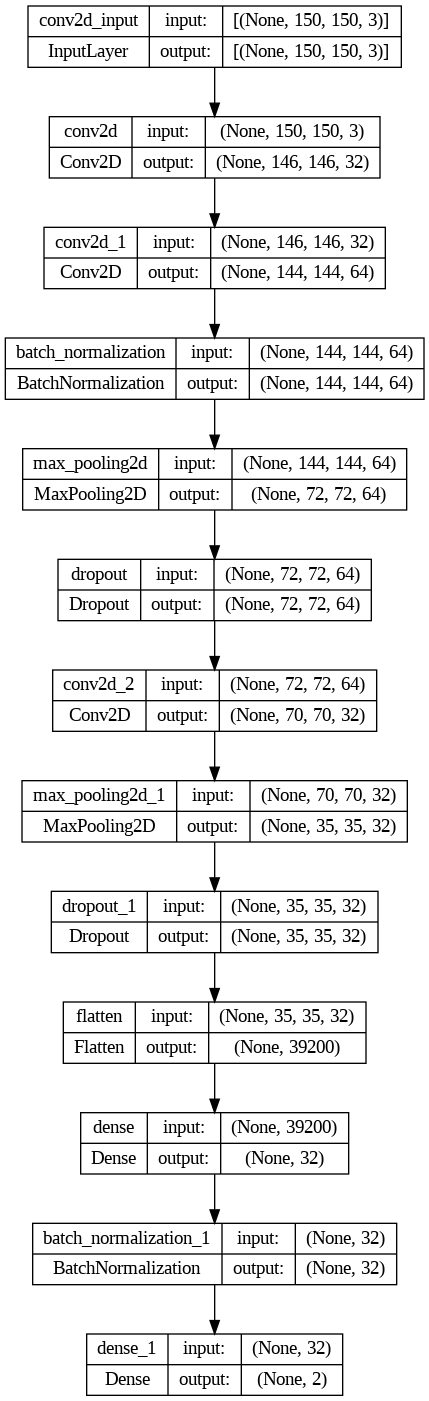

In [ ]:
plot_model(model, to_file = 'cnn_model_structure_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=30, validation_split = 0.2, callbacks=[early_stopping])

Epoch 1/30
15/15 [==============================] - 7s 339ms/step - loss: 0.4328 - accuracy: 0.8194 - val_loss: 2.5634 - val_accuracy: 0.7588
Epoch 2/30
15/15 [==============================] - 5s 328ms/step - loss: 0.2145 - accuracy: 0.9270 - val_loss: 0.4896 - val_accuracy: 0.9013
Epoch 3/30
15/15 [==============================] - 5s 319ms/step - loss: 0.1684 - accuracy: 0.9473 - val_loss: 0.2822 - val_accuracy: 0.8925
Epoch 4/30
15/15 [==============================] - 5s 321ms/step - loss: 0.1550 - accuracy: 0.9451 - val_loss: 0.4554 - val_accuracy: 0.8596
Epoch 5/30
15/15 [==============================] - 5s 331ms/step - loss: 0.1263 - accuracy: 0.9610 - val_loss: 0.2032 - val_accuracy: 0.9232
Epoch 6/30
15/15 [==============================] - 5s 320ms/step - loss: 0.1034 - accuracy: 0.9709 - val_loss: 0.1945 - val_accuracy: 0.9364
Epoch 7/30
15/15 [==============================] - 5s 333ms/step - loss: 0.0746 - accuracy: 0.9797 - val_loss: 0.2321 - val_accuracy: 0.9035
Epoch 

In [ ]:
train_loss = model.evaluate(train_images, train_labels)

72/72 [==============================] - 1s 14ms/step - loss: 0.0344 - accuracy: 0.9899


In [ ]:
test_loss = model.evaluate(test_images, test_labels)

19/19 [==============================] - 0s 13ms/step - loss: 0.1543 - accuracy: 0.9600


In [ ]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

19/19 [==============================] - 0s 11ms/step


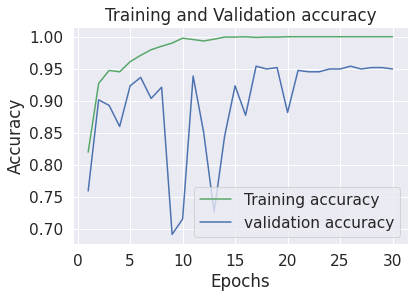

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

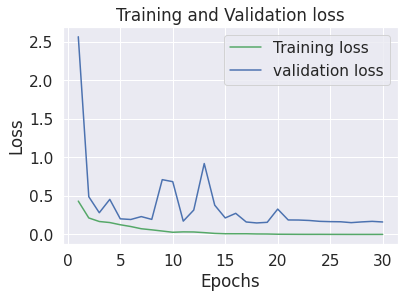

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

print('Confusion Matrix')
print(confusion_matrix(test_labels, pred_labels))



Confusion Matrix
[[293   5]
 [ 19 283]]


In [ ]:
print('Classification Report')
target_names = ['FULL', 'NOT_FULL']
print(classification_report(test_labels, pred_labels,target_names=target_names))

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(test_labels, pred_labels)

print('Accuracy: ', accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_labels, pred_labels)
print('Precision: ', precision)
# recall: tp / (tp + fn)
recall = recall_score(test_labels, pred_labels)
print('Recall: ', recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_labels, pred_labels)
print('F1 score: ',f1)

Classification Report
              precision    recall  f1-score   support

        FULL       0.94      0.98      0.96       298
    NOT_FULL       0.98      0.94      0.96       302

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600

Accuracy:  0.96
Precision:  0.9826388888888888
Recall:  0.9370860927152318
F1 score:  0.9593220338983052
